# Proyecto 2: Análisis de mercado inmobiliario

El trabajo que sigue pretende mejorar los resultados del proyecto 1 aplicando los nuevos conocimientos adquiridos.
Siguiendo la guía de trabajo sugerida, se divide en 3 partes:

- PARTE A - Transformación de Datos: 

    Considero esta instancia la más importante para que luego los modelos funcionen. De hecho, los resultados de los modelos que apliqué en el proyecto 1 se vieron mejorados luego de la limpieza y transformación de dataset. En esta sección se trabajó de la siguiente manera: 
    * Eliminando columnas: Decidí no utilizar ciertas columnas que no iba a utilizar (justificado más abajo) para quitarle ruido al dataset. 
    * Eliminación de valores atípicos: Se analizaron y extrageron los valores atípicos a través de la delimitación de rango intercuartílico.
    * Tratamiento sobre valores faltantes: se eliminaron algunas categorías y se reemplazaron valores los valores de la mediana de los subconjuntos o grupos elegidos. 
    * Escalamiento de datos: Debido a la diversidad de la naturaleza de los datos se escalaron con un standard scaler.
    * Transformación de variables categóricas: Luego de la escalada, se trabajó sobre las variables categóricas. A causa del tamaño que adquirió el dataset, se aplicó una reducción de dimensionalidad con PCA. Esto nos ayuda a trabajar inclusive computacionalmente mejor sobre el dataset.
    
    Las decisiones del orden de todos los pasos no son aleatorias, sino que responden a la lógica de lo que se está trabajando y de lo que se quiere conseguir: crear un modelo para poder determinar el precio de la manera más precisa posible de una propiedad


- PARTE B - Aplicación de Modelos Avanzados:

    En este caso, se han aplicado los modelos de random forest regression, ya que el modelo de árboles fue el que mejor resultados arrojó en el proyecto 1. También se aplicó un modelo de regresión lineal con polynomial features regularizados con Lasso y Ridge. La conslusión, como ser verá más adelante, es que el modelo de Random Forest es el que mejor resultados arrojó. 
    
- PARTE C - Interpretación de modelos

Debido a haber aplicado PCA en la transformación de los datos, se nos hace muy difícil explicar los atributos más relevantes, sin embargo, se pueden sacar algunas conclusiones importantes que se verán más adelante.

## <span style="color:blue"> PARTE A: Limpieza del dataset </span>

*Importamos librerías esenciales y el dataset*

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")
data.columns
data.head(3)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta


In [5]:
data.shape

(146660, 19)

*Eliminación de columnas*

Luego del análisis de la parte 1, ya existe un conocimiento previo sobre el dataset, por lo que tengo una idea más clara sobre los atributos y variables que voy a utilizar. 
Se eliminarán duplicados y las columnas "created_on", "description", "title", "lat" y "lon" porque aún no podría trabajar con esos datos o algunos de ellos no los necesito en esta instancia.
También se eliminarán los atributos "currency", "l1" y "operation_type" porque en todoslos casos los valores toman el mismo valor, (USD, Argentina y Venta respectivamente). Lo comprobamos a través de value_counts()

In [6]:
data["currency"].value_counts()

USD    146660
Name: currency, dtype: int64

In [7]:
data["operation_type"].value_counts()

Venta    146660
Name: operation_type, dtype: int64

In [8]:
data["l1"].value_counts()

Argentina    146660
Name: l1, dtype: int64

In [9]:
data.drop_duplicates(inplace = True)

In [10]:
data.drop(["l1", "created_on", "currency", 'title', 'description','operation_type', "start_date", "end_date", "lat", "lon"], axis=1, inplace = True)

In [11]:
data.drop(data[data["surface_covered"]>data["surface_total"]].index, inplace = True)

Obtengo un shape de 142871 filas, 9 columnas

In [12]:
data.shape

(142871, 9)

# A1. Análisis y extracción de Valores Atípicos

Comenzamos con el análisis y limpieza de valores atípicos ya que esto puede comenzar a excluir errores o valores faltantes de instancias que igualmente eliminaré. Además, comenzar a trabajar y tomar decisiones en base a un dataset que sesgue demasiado algunos valores puede entorpecer mucho los resultados de los modelos.

Analizo las distribuciones de los valores. Primero con describe para obtener a simple vista cómo están distribuidos los datos, y luego con gráficos de histogramas y boxplot

In [13]:
data.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,142871.000000,142871.000000,136962.000000,122610.000000,121532.000000,1.428710e+05
mean,3.075509,1.978414,1.597385,219.694576,104.463006,2.407017e+05
std,1.406420,1.145377,0.886098,2066.221618,741.250119,3.153970e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,2.000000,1.000000,1.000000,52.000000,47.000000,1.100000e+05
50%,3.000000,2.000000,1.000000,79.000000,68.000000,1.652400e+05
75%,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
max,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


Observando dicha tabla, podemos ver que los valores máximos de casi todas las variables, especialmente las de superficie y precio, son muy altos y escapan con gran diferencia a los valores contenidos en el 75% del dataset. Estos valores desproporcionados pueden sesgar significativamente los resultados si no son analizados y limpados.
A continuación, se visualizan con boxplots el comportamiento de las variables rooms, bedrooms, bathrooms, surface_total, surface_covered y price por tipo de propiedad para entender sus distribuciones.

Text(0.5, 1.0, 'Precios según tipo de propiedad')

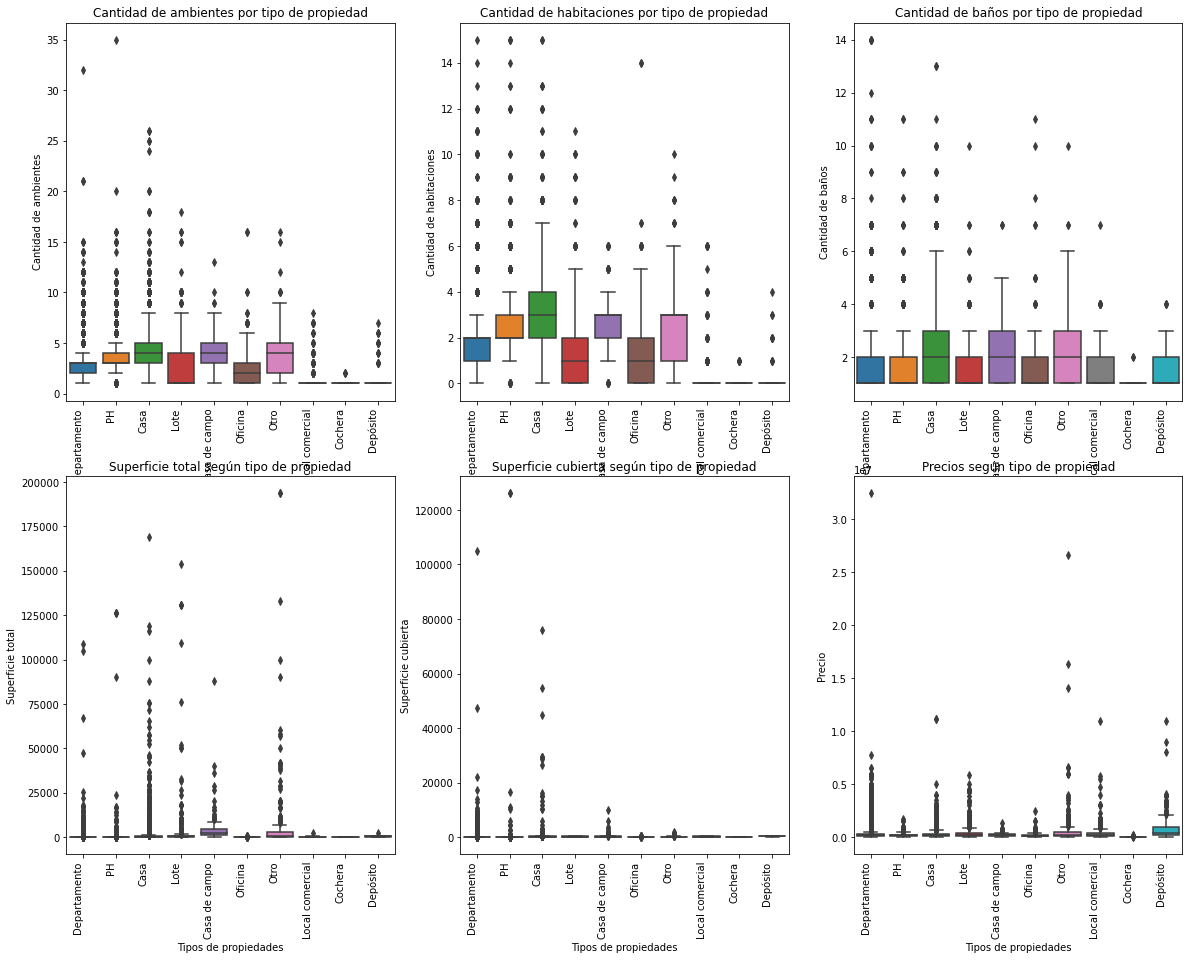

In [14]:
plt.figure(figsize = (20,15.3))
plt.subplot(2,3,1)
ax = sns.boxplot(data = data, x = "property_type", y = "rooms")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.xlabel('Tipos de propiedades')
plt.ylabel('Cantidad de ambientes')
plt.title('Cantidad de ambientes por tipo de propiedad')

plt.subplot(2,3,2)
ax2 = sns.boxplot(data = data, x = "property_type", y = "bedrooms")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="right")
plt.xlabel('Tipos de propiedades')
plt.ylabel('Cantidad de habitaciones')
plt.title('Cantidad de habitaciones por tipo de propiedad')

plt.subplot(2,3,3)
ax3 = sns.boxplot(data = data, x = "property_type", y = "bathrooms")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90, ha="right")
plt.xlabel('Tipos de propiedades')
plt.ylabel('Cantidad de baños')
plt.title('Cantidad de baños por tipo de propiedad')

plt.subplot(2,3,4)
ax4 = sns.boxplot(data = data, x = "property_type", y = "surface_total")
ax4.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.xlabel('Tipos de propiedades')
plt.ylabel('Superficie total')
plt.title('Superficie total según tipo de propiedad')

plt.subplot(2,3,5)
ax5 = sns.boxplot(data = data, x = "property_type", y = "surface_covered")
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=90, ha="right")
plt.xlabel('Tipos de propiedades')
plt.ylabel('Superficie cubierta')
plt.title('Superficie cubierta según tipo de propiedad')

plt.subplot(2,3,6)
ax6 = sns.boxplot(data = data, x = "property_type", y = "price")
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=90, ha="right")
plt.xlabel('Tipos de propiedades')
plt.ylabel('Precio')
plt.title('Precios según tipo de propiedad')

Efectivamente los boxplot manifiestan que las variables superficie total, superficie cubierta y precio tienen algunos outliers que, valga la redundancia, escapan muchísimo de los valores normales y desvirtuarían los resultados. Filtramos entonces nuestro dataset de outliers. Para ello utilizamos el rango intercuartílico en lugar del 3 sigma ya que no todas las variables tienen una distribución normal o tienen sesgo. 

*Delimitación de Rango Intercuartílico*

In [15]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

bathrooms           5408
bedrooms             393
l2                     0
l3                     0
price              10713
property_type          0
rooms               1382
surface_covered     9547
surface_total      13189
dtype: int64

*Eliminamos los oultiers*

In [16]:
data = data[~((data < (Q1 - 1.5*IQR)) | (data > (Q3 + 1.5*IQR))).any(axis=1)]
data.shape

(119712, 9)

In [17]:
data.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,119712.000000,119712.000000,114859.000000,101283.000000,100898.000000,119712.000000
mean,2.762647,1.744645,1.382356,81.399524,67.980000,175397.484362
std,1.070417,0.941032,0.591290,45.732562,32.281058,93344.776933
min,1.000000,0.000000,1.000000,10.000000,1.000000,6000.000000
25%,2.000000,1.000000,1.000000,49.000000,44.000000,105000.000000
50%,3.000000,2.000000,1.000000,68.000000,60.000000,150000.000000
75%,3.000000,2.000000,2.000000,100.000000,83.000000,225000.000000
max,7.000000,6.000000,3.000000,272.000000,199.000000,497500.000000


Ahora los valores máximos son más razonables. En los siguientes gráficos podemos observar cómo es la distribución de los mismos en un histograma y en boxplot. Éstos gráficos ya van arrojando información interesante de cómo son las distribuciones por tipo de propiedad también. Notar que al evaluar los datos en función del tipo de propiedad ya me va dándo una idea de cómo se ordenan los datos en función de una variable que hasta el momento, considero importante. 

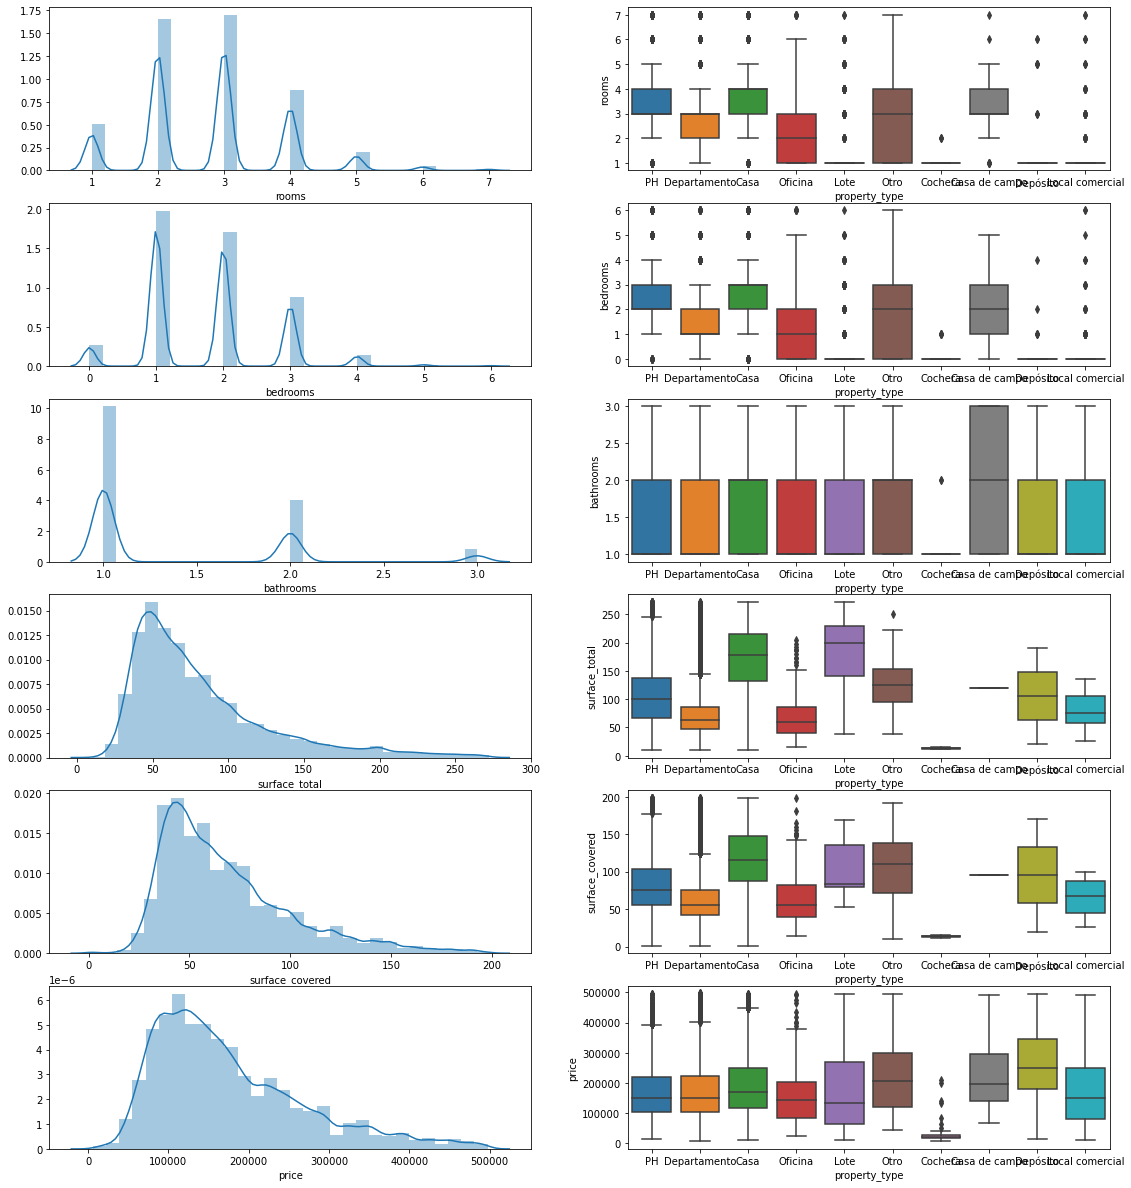

In [18]:
#cómo le pongo título a este gráfico?
aux=1
plt.figure(figsize=(19,21))
for i in range(2,8):
    plt.subplot(6,2, aux)
    sns.distplot(data.iloc[:, i], bins=30)
    
    plt.subplot(6,2,aux+1)
    sns.boxplot(data= data, x='property_type', y=data.iloc[:, i])
    aux+=2

# A2. Valores Faltantes

Con el dataset libre de outliers, analizo la cantidad de valores faltantes por atributo:

In [19]:
mis_val = data.isnull().sum()
mis_val

l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           4853
surface_total      18429
surface_covered    18814
price                  0
property_type          0
dtype: int64

Y cómo se distribuyen los valores no faltantes en porcentaje por tipo de propiedad

In [20]:
data["property_type"].value_counts(normalize = True)*100

Departamento       79.545910
PH                 10.582064
Casa                8.168772
Oficina             0.494520
Lote                0.484496
Cochera             0.216353
Local comercial     0.207164
Otro                0.136995
Depósito            0.121124
Casa de campo       0.042602
Name: property_type, dtype: float64

Para trabajar más cómodamente con los valores faltantes, se realiza un nuevo dataset sólo con aquellas columnas con valores faltantes incluyendo la variable property_type, que además de contener todos los valores, nos sirve para el análisis.

In [21]:
data_VF = data.drop(['rooms','bedrooms', "l2", "l3", "price"], axis=1)
data_VF.shape
data_VF.head()

,bathrooms,surface_total,surface_covered,property_type
1,2.0,70.0,58.0,PH
2,1.0,45.0,45.0,PH
3,1.0,85.0,50.0,PH
4,1.0,50.0,35.0,PH
5,1.0,56.0,56.0,PH


In [22]:
mis_val_vf = data_VF.isnull().sum()
mis_val_vf

bathrooms           4853
surface_total      18429
surface_covered    18814
property_type          0
dtype: int64

Se realiza un pairpot para ver el comportamiento de las variables. A simple viste se observa una relación entre superficie total y superficie cubierta. 

/Users/eugeniasandrone/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/eugeniasandrone/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


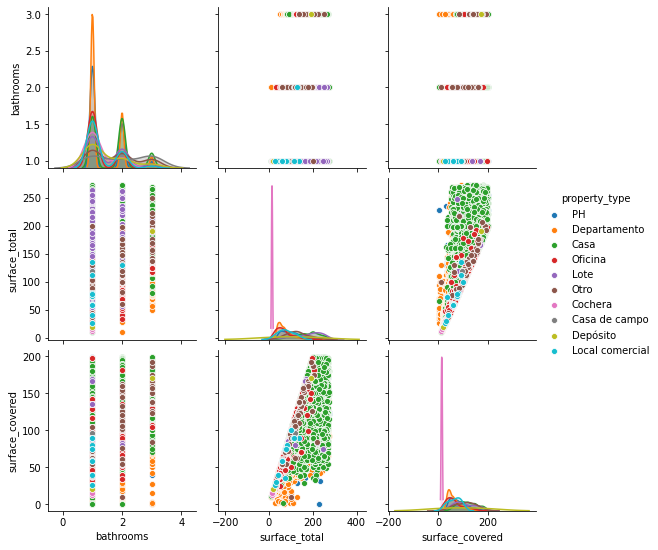

In [23]:
sns.pairplot(data_VF, hue = 'property_type')
plt.show()

*Distribución de VF por tipo de propiedad*

Como property_type es una variable sin valores faltantes y un indicador importante para determinar el precio, analizo en qué porcentaje faltan o no valores por cada tipo de propiedad.

*Valores Faltantes en BATHROOM*

In [24]:
data_VF = data.property_type[(data.bathrooms.isnull())].groupby([data.property_type]).size().reset_index(name='Valores_NA')
data_VF['Valores_no_NA'] = data.property_type[(data.bathrooms.isnull()==False )].groupby([data.property_type]).size().reset_index(name='Valores_NA').iloc[:,1]

data_VF['% faltantes'] = data_VF['Valores_NA'] / (data_VF['Valores_no_NA']+data_VF['Valores_NA'])*100
data_VF['% NO_faltantes'] = 100 - data_VF['% faltantes'] 
data_VF

,property_type,Valores_NA,Valores_no_NA,% faltantes,% NO_faltantes
0,Casa,972,8807,9.939667,90.060333
1,Casa de campo,14,37,27.450980,72.549020
2,Cochera,250,9,96.525097,3.474903
3,Departamento,2589,92637,2.718795,97.281205
4,Depósito,117,28,80.689655,19.310345
5,Local comercial,117,131,47.177419,52.822581
6,Lote,454,126,78.275862,21.724138
7,Oficina,107,485,18.074324,81.925676
8,Otro,79,85,48.170732,51.829268
9,PH,154,12514,1.215662,98.784338


*Valores Faltantes en SURFACE COVERED*

In [25]:
data_VF = data.property_type[(data.surface_covered.isnull())].groupby([data.property_type]).size().reset_index(name='Valores_NA')
data_VF['Valores_no_NA'] = data.property_type[(data.surface_covered.isnull()==False )].groupby([data.property_type]).size().reset_index(name='Valores_NA').iloc[:,1]

data_VF['% faltantes'] = data_VF['Valores_NA'] / (data_VF['Valores_no_NA']+data_VF['Valores_NA'])*100
data_VF['% NO_faltantes'] = 100 - data_VF['% faltantes'] 
data_VF

,property_type,Valores_NA,Valores_no_NA,% faltantes,% NO_faltantes
0,Casa,4030,5749,41.210758,58.789242
1,Casa de campo,50,1,98.039216,1.960784
2,Cochera,257,2,99.227799,0.772201
3,Departamento,13020,82206,13.672736,86.327264
4,Depósito,143,2,98.620690,1.379310
5,Local comercial,234,14,94.354839,5.645161
6,Lote,570,10,98.275862,1.724138
7,Oficina,264,328,44.594595,55.405405
8,Otro,102,62,62.195122,37.804878
9,PH,144,12524,1.136722,98.863278


*Valores Faltantes en SURFACE TOTAL*

In [26]:
data_VF = data.property_type[(data.surface_total.isnull())].groupby([data.property_type]).size().reset_index(name='Valores_NA')
data_VF['Valores_no_NA'] = data.property_type[(data.surface_total.isnull()==False )].groupby([data.property_type]).size().reset_index(name='Valores_NA').iloc[:,1]

data_VF['% faltantes'] = data_VF['Valores_NA'] / (data_VF['Valores_no_NA']+data_VF['Valores_NA'])*100
data_VF['% NO_faltantes'] = 100 - data_VF['% faltantes'] 
data_VF

,property_type,Valores_NA,Valores_no_NA,% faltantes,% NO_faltantes
0,Casa,4075,5704,41.670927,58.329073
1,Casa de campo,50,1,98.039216,1.960784
2,Cochera,257,2,99.227799,0.772201
3,Departamento,12743,82483,13.381849,86.618151
4,Depósito,143,2,98.620690,1.379310
5,Local comercial,233,15,93.951613,6.048387
6,Lote,462,118,79.655172,20.344828
7,Oficina,248,344,41.891892,58.108108
8,Otro,99,65,60.365854,39.634146
9,PH,119,12549,0.939375,99.060625


Las tablas anteriores ya arrojan mucha información. Principalmente en cuanto a cuáles son los tipos de propiedades que tienen mayor cantidad de valores faltantes.
Por defecto, cochera, depósito y Lote tendrán menos valores en baños y superficie, o porque no tienen (en caso de baño), o porque son por defecto (en caso de superficie), o porque no hay diferencia entre superficie cubierta o total.
Si bien se podrían reemplazar en algunos casos ciertos valores con cero, como en el caso de baño, considero que por la cantidad de valores faltantes, por el bajo número de esos tipos de propiedad y el bajo impacto en el dataset y por ser las variables bathroom y de superficies determinantes en el precio, será mejor retirar esos tipos de propiedades y quedarme con aquellas que tenga datos más robustos. 

*Imputar valores faltantes*

Comienzo retirando los tipos de propiedades que mencionaba antes y que no tienen demasiado peso en el dataset. Es decir, me quedo sólo con Departamento, PH y Casa.

In [27]:
data_2 = data[((data["property_type"] == "Departamento") | (data["property_type"] == "PH") | (data["property_type"] == "Casa")) ]

In [28]:
data_2

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
4,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,PH
5,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH
...,...,...,...,...,...,...,...,...,...
146655,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,Departamento
146656,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,Departamento
146657,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,Departamento
146658,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,Departamento


Compruebo la cantidad de valores faltantes en este nuevo dataset

In [31]:
mis_val_2 = data_2.isnull().sum()
mis_val_2

l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           3715
surface_total      16937
surface_covered    17194
price                  0
property_type          0
dtype: int64

El nuevo dataset ya tiene menos valores faltantes. Para poder imputar valores, agrupamos las instancias del dataset por el tipo de propiedad, la zona (l3) y la cantidad de habitaciones (rooms) ya que ambas variables contienen todos los datos y porque, por conocimiento previo del sistema inmobiliario, sabemos que las propiedades organizadas en función de éstas variables, pueden guardar otras características similares también. Llamamos glr al Agrupamiento por tipo de propiedad, L3 y Rooms.

In [32]:
glr = data_2.groupby(['property_type', 'l3',"rooms"])

In [33]:
glr.first() 

l2  bedrooms  bathrooms  \
property_type l3               rooms                                         
Casa          Abasto           4.0    Capital Federal       3.0        2.0   
              Agronomía        3.0    Capital Federal       2.0        1.0   
                               4.0    Capital Federal       3.0        2.0   
                               6.0    Capital Federal       5.0        2.0   
              Almagro          2.0    Capital Federal       1.0        2.0   
...                                               ...       ...        ...   
PH            Villa del Parque 3.0    Capital Federal       2.0        1.0   
                               4.0    Capital Federal       3.0        1.0   
                               5.0    Capital Federal       4.0        3.0   
                               6.0    Capital Federal       3.0        2.0   
                               7.0    Capital Federal       4.0        2.0   

                                      surface_total  surface_covered     price  
property_type l3               rooms                                            
Casa          Abasto           4.0            216.0            118.0  415000.0  
              Agronomía        3.0            185.0            125.0  260000.0  
                               4.0            174.0            142.0  249999.0  
                               6.0              NaN              NaN  355000.0  
              Almagro          2.0             68.0             65.0  160000.0  
...                                             ...              ...       ...  
PH            Villa del Parque 3.0             70.0             68.0  130000.0  
                               4.0            170.0             98.0  220000.0  
                               5.0            100.0            100.0  288000.0  
                               6.0            160.0            160.0  224000.0  
                               7.0            260.0            170.0  330000.0  

[1311 rows x 6 columns]

Analizamos los valores estadísticos de este agrupamiento en función de la variable *bathrooms*

In [34]:
print(glr['bathrooms'].agg([np.median, np.mean, np.std, np.sum]))

                                      median      mean       std    sum
property_type l3               rooms                                   
Casa          Abasto           4.0       2.0  2.000000       NaN    2.0
              Agronomía        3.0       1.5  1.500000  0.707107    3.0
                               4.0       2.0  1.666667  0.577350    5.0
                               6.0       2.0  2.000000       NaN    2.0
              Almagro          2.0       1.5  1.500000  0.707107    3.0
...                                      ...       ...       ...    ...
PH            Villa del Parque 3.0       1.0  1.175000  0.423322  141.0
                               4.0       1.0  1.511628  0.589001  130.0
                               5.0       3.0  2.413793  0.866736   70.0
                               6.0       2.0  1.857143  0.377964   13.0
                               7.0       2.0  2.000000  0.000000    6.0

[1311 rows x 4 columns]


Analizamos los valores estadísticos de este agrupamiento en función de la variable *surface_total*

In [35]:
print(glr['surface_total'].agg([np.median, np.mean, np.std, np.sum]))

                                      median        mean        std      sum
property_type l3               rooms                                        
Casa          Abasto           4.0     216.0  216.000000        NaN    216.0
              Agronomía        3.0     167.5  167.500000  24.748737    335.0
                               4.0     174.0  202.666667  49.652123    608.0
                               6.0       NaN         NaN        NaN      0.0
              Almagro          2.0      66.0   66.000000   2.828427    132.0
...                                      ...         ...        ...      ...
PH            Villa del Parque 3.0      94.0  102.596639  33.909730  12209.0
                               4.0     121.0  137.413793  42.667059  11955.0
                               5.0     100.0  125.310345  40.153370   3634.0
                               6.0     165.0  174.285714  24.736709   1220.0
                               7.0     260.0  260.000000   0.000000    780.0

Analizamos los valores estadísticos de este agrupamiento en función de la variable *surface_total*

In [36]:
print(glr['surface_covered'].agg([np.median, np.mean, np.std, np.sum]))

                                      median        mean        std     sum
property_type l3               rooms                                       
Casa          Abasto           4.0     118.0  118.000000        NaN   118.0
              Agronomía        3.0     126.0  126.000000   1.414214   252.0
                               4.0     142.0  154.666667  21.939310   464.0
                               6.0       NaN         NaN        NaN     0.0
              Almagro          2.0      65.0   65.000000        NaN    65.0
...                                      ...         ...        ...     ...
PH            Villa del Parque 3.0      70.0   76.050000  30.206252  9126.0
                               4.0      98.0  100.152941  28.494989  8513.0
                               5.0     100.0  108.428571  24.409210  3036.0
                               6.0     165.0  161.428571   5.563486  1130.0
                               7.0     170.0  170.000000   0.000000   510.0

[1311 rows 

En función de dicha información, se toma la decisión que la variable más apropiada con la que imputar los datos faltantes en cada caso es la median por tipo de propiedad, l3 y cantidad de habitaciones. Ésto quizás nos de valores muy aproximados a los reales.

In [37]:
data_2['bathrooms'] = data_2['bathrooms'].fillna(data_2.groupby(['property_type','l2'])['bathrooms'].transform('median'))

<ipython-input-37-0ab2d3ea556c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['bathrooms'] = data_2['bathrooms'].fillna(data_2.groupby(['property_type','l2'])['bathrooms'].transform('median'))


In [38]:
data_2['surface_total'] = data_2['surface_total'].fillna(data_2.groupby(['property_type','l2'])['surface_total'].transform('median'))

<ipython-input-38-cee3c34b12b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['surface_total'] = data_2['surface_total'].fillna(data_2.groupby(['property_type','l2'])['surface_total'].transform('median'))


In [39]:
data_2['surface_covered'] = data_2['surface_covered'].fillna(data_2.groupby(['property_type','l2'])['surface_covered'].transform('median'))

<ipython-input-39-2be2331a318f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['surface_covered'] = data_2['surface_covered'].fillna(data_2.groupby(['property_type','l2'])['surface_covered'].transform('median'))


Ahora sí nos queda un dataset sin valores nulos

In [40]:
data_2.isnull().sum()

l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

# A3. Escalada de datos

Estandarizamos los datos según las desviaciones ya que por la naturaleza de cada atributo, los valores son muy diferentes y no expresan los mismo. Escalo los valores de las columnas rooms, bedrooms, bathrooms, surface_total y surface_covered.

In [41]:
from sklearn.preprocessing import StandardScaler
X_esc = data_2.iloc[:, 2:7]
scl = StandardScaler()
X_esc = scl.fit_transform(X_esc)
for i in range(2,7):
    data_2.iloc[:, i] = X_esc[:, i-2]

/Users/eugeniasandrone/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [42]:
data_2

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1,Capital Federal,Boedo,-0.737468,-0.823135,1.059098,-0.267421,-0.316081,159000.0,PH
2,Capital Federal,Palermo,-0.737468,-0.823135,-0.644321,-0.804929,-0.731764,125000.0,PH
3,Capital Federal,Palermo,-0.737468,-0.823135,-0.644321,0.055084,-0.571886,295000.0,PH
4,Bs.As. G.B.A. Zona Sur,La Plata,-0.737468,-0.823135,-0.644321,-0.697427,-1.051520,40000.0,PH
5,Capital Federal,Villa Crespo,-0.737468,-0.823135,-0.644321,-0.568425,-0.380033,150000.0,PH
...,...,...,...,...,...,...,...,...,...
146655,Bs.As. G.B.A. Zona Sur,Berazategui,-0.737468,-0.823135,-0.644321,-0.611426,-0.635838,165000.0,Departamento
146656,Bs.As. G.B.A. Zona Norte,Pilar,1.156590,1.338838,1.059098,1.753608,0.707138,130000.0,Departamento
146657,Bs.As. G.B.A. Zona Norte,Pilar,-1.684497,-0.823135,-0.644321,-0.697427,-1.051520,73000.0,Departamento
146658,Bs.As. G.B.A. Zona Norte,Pilar,-0.737468,-0.823135,-0.644321,-0.955431,-0.955594,68000.0,Departamento


# A4. Transformación de variables categóricas

Transformo las variables categóricas de l2, l3 y property_type para utilizarlas en el análisis

In [43]:
dummy_pt = pd.get_dummies(data_2["property_type"], prefix="property_type")
dummy_l3 = pd.get_dummies(data_2["l3"], prefix="l3")
dummy_l2 = pd.get_dummies(data_2["l2"], prefix="l2")

In [44]:
data_2 = pd.concat([data_2, dummy_pt], axis = 1)
data_2 = pd.concat([data_2, dummy_l3], axis = 1)
data_2 = pd.concat([data_2, dummy_l2], axis = 1)

Elimino las columas que aún contienen las variables categóricas l2, l3 y property_type.
Finalmente el dataset queda con 117673 filas y 102 columnas

In [45]:
data_3 = data_2.drop(data_2.columns[[0,1,8]], axis = 1)

In [46]:
data_3

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type_Casa,property_type_Departamento,property_type_PH,l3_Abasto,...,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque,l2_Bs.As. G.B.A. Zona Norte,l2_Bs.As. G.B.A. Zona Oeste,l2_Bs.As. G.B.A. Zona Sur,l2_Capital Federal
1,-0.737468,-0.823135,1.059098,-0.267421,-0.316081,159000.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.737468,-0.823135,-0.644321,-0.804929,-0.731764,125000.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.737468,-0.823135,-0.644321,0.055084,-0.571886,295000.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.737468,-0.823135,-0.644321,-0.697427,-1.051520,40000.0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5,-0.737468,-0.823135,-0.644321,-0.568425,-0.380033,150000.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,-0.737468,-0.823135,-0.644321,-0.611426,-0.635838,165000.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
146656,1.156590,1.338838,1.059098,1.753608,0.707138,130000.0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
146657,-1.684497,-0.823135,-0.644321,-0.697427,-1.051520,73000.0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
146658,-0.737468,-0.823135,-0.644321,-0.955431,-0.955594,68000.0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


# A5. Reducción de dimensionalidad

Debido al tamaño que adquirió el dataset, se realizará una reducción de la dimensionalidad con PCA. 
Se trabajará sobre todo el dataset excluyendo la columna precio, ya que será nuestra "y" en los modelos de Machine Learning.

In [49]:
from sklearn.decomposition import PCA

In [50]:
data_4 = data_3.drop(data_3.columns[[5]], axis = 1)

Comienzo con 2 componentes para obtener las fórmulas y luego analizo la Varianza Explicada Acumulada.

In [51]:
from sklearn.decomposition import PCA
X = data_4
pca = PCA(n_components=2)
X_nuevo = pca.fit_transform(X) 
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.53628207 0.09494725]
[655.41908583 275.78054785]


Grafico el resultado de la Varianza Explicada Acumulada por cada número de componentes para evaluar cuál podría ser el mejor número que me reduzca el dataset y a la vez mantener información valiosa.

Text(0, 0.5, 'Varianza Explicada Acumulada')

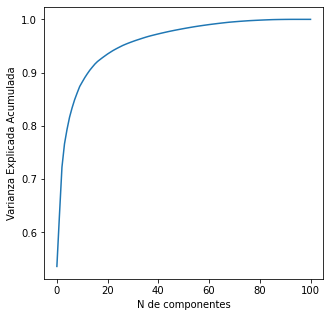

In [52]:
plt.figure(figsize=(5,5))
plt.xscale("linear")
pca=PCA().fit(data_4)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("N de componentes")
plt.ylabel("Varianza Explicada Acumulada")

Se decide, en función de observar el gráfico anterior y algunos intentos probando diferente cantidad de componentes, que 67 puede ser un número de componente que nos mantenga la calidad del dataset y que a la vez reduzca considerablemente el tamaño del mismo, para que luego podamos procesarlo en la computadora. Quizás un mayor número de componentes, como 80, arrojen luego mejores resultados, per según el testeo que realicé, la mejora es bastante pequeña en comparación al costo en tiempo de procesamiento de los modelos o colapso del sistema.

In [53]:
X = data_4
pca = PCA(n_components=67)
X_nuevo = pca.fit_transform(X) 
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.53628207 0.09494725 0.09128397 0.04378025 0.02718814 0.02294216
 0.01753331 0.01528828 0.01273336 0.01209705 0.00835449 0.00818073
 0.00728715 0.00678885 0.00584572 0.00562817 0.00465988 0.00372293
 0.00365015 0.0034305  0.00340414 0.00305334 0.003019   0.00265772
 0.00253607 0.00240914 0.00237258 0.00202757 0.00193944 0.00180715
 0.00174596 0.00170331 0.00156039 0.00155542 0.00155075 0.00150385
 0.00140588 0.00128843 0.00120411 0.00118862 0.00115043 0.00114105
 0.00108815 0.00107797 0.00105944 0.0009992  0.00097354 0.00093928
 0.00091746 0.00089476 0.00088043 0.00085596 0.00083317 0.0008217
 0.00080965 0.00074955 0.00072528 0.00069042 0.00068707 0.000664
 0.00065004 0.0006131  0.00059759 0.0005908  0.00056573 0.00055129
 0.00053852]
[655.41908583 275.78054785 270.40810308 187.26713078 147.57480493
 135.5625214  118.50982486 110.66281386 100.99363843  98.43787459
  81.80546812  80.95027928  76.40139147  73.74296714  68.42919191
  67.14382566  61.09560139  54.60908524  54.07263785  5

In [54]:
print(pca.explained_variance_ratio_.cumsum())

[0.53628207 0.63122932 0.72251329 0.76629354 0.79348168 0.81642385
 0.83395715 0.84924543 0.86197879 0.87407584 0.88243033 0.89061106
 0.89789821 0.90468706 0.91053278 0.91616095 0.92082083 0.92454376
 0.92819391 0.93162441 0.93502855 0.93808189 0.94110089 0.94375861
 0.94629468 0.94870382 0.9510764  0.95310396 0.9550434  0.95685055
 0.95859651 0.96029983 0.96186021 0.96341563 0.96496638 0.96647023
 0.96787611 0.96916453 0.97036864 0.97155726 0.97270769 0.97384875
 0.9749369  0.97601487 0.97707431 0.97807351 0.97904704 0.97998632
 0.98090379 0.98179855 0.98267898 0.98353494 0.98436811 0.9851898
 0.98599945 0.986749   0.98747428 0.9881647  0.98885176 0.98951576
 0.9901658  0.9907789  0.9913765  0.9919673  0.99253303 0.99308432
 0.99362285]


Con mi nuevo dataset retengo el 99% de la varianza

# Evaluación de mi dataset con respecto a los modelos anteriormente utilizados

Traigo de mi trabajo anterior los mismos modelos con los mismos hiperparámetros para evaluar el desempeño con el nuevo dataset

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [56]:
from sklearn.model_selection import train_test_split
X = X_nuevo
y = data_3.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(82371, 67) (82371,) (35302, 67) (35302,)


In [57]:
linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=11, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=8)

In [58]:
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [59]:
print(linear_model.coef_, linear_model.intercept_)

[  30023.81079547  -27472.41462112  -19254.34626324  -36772.12679647
  -45973.43927595   -7342.0493556   -28102.35371824   12728.34293335
  -26285.78758411   31273.28477701   -8607.16873637   40444.90003631
   -7489.58629051   31758.36144894    5583.38907072    2010.34321182
   43411.65137043   32086.17129096   -4438.83593431   -6099.72170206
  -50504.97551285  -39507.56452123   52286.93728691   -2692.40390253
    3211.94124307    2755.76560881  -15766.56809159   47794.34898834
  -74025.00447043  -48284.88809986   17478.78512468   12952.09269467
    2138.86656553  -20464.17825483  -29949.80854384   18736.59692631
   25100.60533533   40354.18047597    1778.75627797   -1827.97469783
    6244.55809423  -20240.16607841   22670.49495358  -21069.62168302
  -13376.62706555   -3783.31785838   39633.32212873   -5377.42053678
  -10516.41242517   -2762.56992746   34264.64551256   29838.26836495
  -17007.81829741  -21106.1453373    21382.69071296   -6733.07574603
  -11529.69058154  -19519.93115141

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 52251.4721699104
Raíz del error cuadrático medio en Test: 52234.82133254939
El error r2 en Train es: 0.6820469498840136
El error r2 en Test es: 0.684886319395872


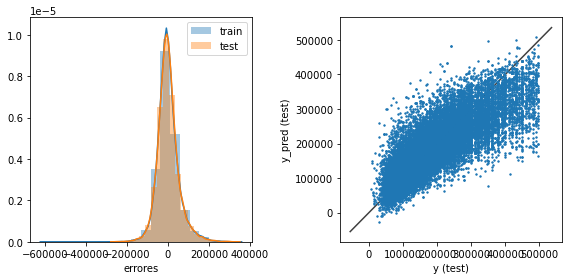

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 42088.65110928719
Raíz del error cuadrático medio en Test: 47014.70290165983
El error r2 en Train es: 0.7937015580222025
El error r2 en Test es: 0.7447213918164005


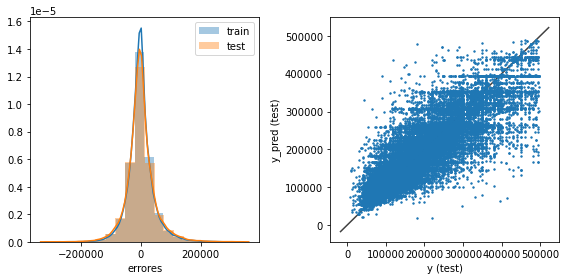

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 38806.90229159893
Raíz del error cuadrático medio en Test: 43357.01365733274
El error r2 en Train es: 0.8246184565914152
El error r2 en Test es: 0.7828970354638665


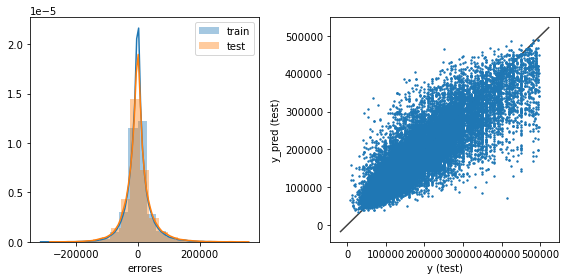

In [60]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    print(f"El error r2 en Train es: {r2_train}")
    print(f"El error r2 en Test es: {r2_test}")
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

Este nuevo dataset ha mejorado en gran medida los resultados que había obtenido en el proyecto anterior con exactamente los mismos modelos:

*Modelo de regresión lineal Proyecto 1*
- Raíz del error cuadrático medio en Train: 203015.35633339902/////
- Raíz del error cuadrático medio en Test: 205955.81413686287////
- El error r2 en Train es: 0.5343324125533506////
- El error r2 en Test es: 0.5358152638872632.

En este caso, ha mejorado considerablemente la performance tanto en test como en train, prácticamente en igual medida. Esto nos puede indicar que nuestro nuevo dataset está mucho más preprocesado que el anterior y de manera correcta

*Modelo Árboles de Decisión en Proyecto 1*
- Raíz del error cuadrático medio en Train: 202993.54524281574
- Raíz del error cuadrático medio en Test: 204792.88471910908
- El error r2 en Train es: 0.534432465795805
- El error r2 en Test es: 0.5410425021388487

En este caso, el desempeño mejoró muchísimo, aunque es cierto que quizás la distancia entre el set de train y test se haya ampliado un poquito, lo que podría indicar overfitting.


*Modelo de Vecinos más cercanos en Proyecto 1*
- Raíz del error cuadrático medio en Train: 161891.72981294463
- Raíz del error cuadrático medio en Test: 181732.7963361336
- El error r2 en Train es: 0.7038801247608757
- El error r2 en Test es: 0.6385823477171335

En los vecinos más cercanos, no sólo que mejoró la performance sino que también creo que se ha reducido la diferencia entre test y train

## <span style="color:blue"> PARTE B: Modelos Avanzados </span>

Trabajamos ahora con modelos avanzados para buscar mejores resultados en el dataset.
Aplicaremos primero un Random Forest y uno de Polynomial Features con regularización. 

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import sklearn.metrics as metrics
from sklearn.model_selection import learning_curve

Definimos variables X e y, y realizamos un train/test split del 30%

In [62]:
X = X_nuevo
y = data_3.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(82371, 67) (82371,) (35302, 67) (35302,)


# Modelo 1: Random Forest

Elegimos comenzar con un Random Forest, ya que anteriormente el modelo de árbol de decisión nos dio buenos resultados. Algunos hiperparámetros son aleatorios, pero damos una profundidad de 11, que es lo que mejor nos funcionó anteriormente.

In [63]:
regr = RandomForestRegressor(n_estimators=20, max_depth=11, max_features='sqrt', n_jobs=-1, random_state = 42)
regr.fit(X_train,y_train)

RandomForestRegressor(max_depth=11, max_features='sqrt', n_estimators=20,
                      n_jobs=-1, random_state=42)

In [64]:
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

Analizo la performance del modelo utilizando R2, RSME y Cross Validation con un K Fold de 5 para no sobrecargar la pc.

In [65]:
print('R^2 Training Score: {:.2f} \nR^2 Validation Score: {:.2f} \nRsme Train: {:.2f}  \nRsme Test: {:.2f} \nr2_cv: {:.2f} \nrsme_cv: {:.2f}'.format(regr.score(X_train, y_train), 
                                                                                             regr.score(X_test, y_test),
                                                                                             np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)),
                                                                                             np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)),
                                                                                             cross_val_score(regr, X_train, y_train, scoring="r2", cv=5).mean(),
                                                                                             cross_val_score(regr, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5).mean()))
                                                                                             

R^2 Training Score: 0.81 
R^2 Validation Score: 0.78 
Rsme Train: 40520.79  
Rsme Test: 44003.35 
r2_cv: 0.77 
rsme_cv: -44356.16


El primer modelo con hiperparámetros al azar ha dado buenos resultados, mejores que antes. 
De todos modos, analizaremos cuáles son los hiperparámetros más apropiados. Excluiremos OOB ya que aparentemente no todos los inputs lo tienen.

Elegimos los mejores parámetros de nuestro modelo. Para esto, utilizamos Random Grid Search y analizamos cada uno de los hiperparámetros que quiero tener en cuenta.

In [103]:
from sklearn.model_selection import RandomizedSearchCV

X, y = X_nuevo, data_3.price
model = RandomForestRegressor(random_state=42)
param_grid = {'n_estimators':np.arange(1, 80),
              'criterion': ["auto",'mse'], 
              'max_features':["auto", "sqrt"],
              "bootstrap": [True, False],
              'max_depth':np.arange(1, 20)}
grid_search = RandomizedSearchCV(model, param_grid, n_jobs=-1, cv=2, n_iter = 25)
grid_search.fit(X_nuevo, data_3.price)
print(grid_search.best_params_)

{'n_estimators': 26, 'max_features': 'sqrt', 'max_depth': 18, 'criterion': 'mse', 'bootstrap': True}


Aplicamos los resultados obtenidos en un modelo que llamamos reg2

In [66]:
reg2 = RandomForestRegressor(n_estimators=26, max_depth=18, criterion="mse", max_features='sqrt', bootstrap=False, n_jobs=-1, random_state = 42)
reg2.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=18, max_features='sqrt',
                      n_estimators=26, n_jobs=-1, random_state=42)

In [67]:
y_train_pred_reg2 = reg2.predict(X_train)
y_test_pred_reg2 = reg2.predict(X_test)

In [68]:
print('R^2 Training Score: {:.2f} \nR^2 Validation Score: {:.2f} \nRsme Train: {:.2f}  \nRsme Test: {:.2f} \nr2_cv: {:.2f} \nrsme_cv: {:.2f}'.format(reg2.score(X_train, y_train), 
                                                                                             reg2.score(X_test, y_test),
                                                                                             np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_reg2)),
                                                                                             np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_reg2)),
                                                                                             cross_val_score(reg2, X_train, y_train, scoring='r2', cv=5).mean(),
                                                                                             cross_val_score(reg2, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5).mean()))
                                                                                             

R^2 Training Score: 0.93 
R^2 Validation Score: 0.83 
Rsme Train: 25357.41  
Rsme Test: 38147.78 
r2_cv: 0.82 
rsme_cv: -39445.02


En este caso vemos que el modelo ha mejorado muchísimo en comparación a los otros modelos que se aplicaron anteriormente, incluso el de vecinos más cercanos. Obtengo también un buen resultado con cross validation de 5 K folds. 

# Modelo 2: Polynomial Features con Regularización Lasso y Ridge 

Ya vimos en el proyecto 1, y con los resultados que hemos obtenido ahora, que la regresión linal simple no es el mejor modelo que se ajusta a este problema, justamente porque es un problema no lineal. Por esta razón, trabajaremos con Polynomila Features para ajustarlo mejor a un problema lineal. Se utilizará como hiperparámetro el grado 2, porque el dataset ya es grande y se elevaría muchísimo más si pongo otros grados, teniendo un costo computacional altísimo. 

Preparamos el dataset

In [69]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.pipeline import Pipeline

In [70]:
X = X_nuevo
y = data_3.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [71]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X.shape, y.shape)

(82371, 67) (82371,) (35302, 67) (35302,) (117673, 67) (117673,)


Por el tamaño del dataset, trabajaremos con un degree de 2 y no realizaremos un Random Search o Grid Search porque de todos modos, la computadora no podría procesar mucho más (se intentó varias veces).

In [66]:
poly = PolynomialFeatures(degree = 2, include_bias=False) 
X_train_new = poly.fit_transform(X_train)
X_test_new = poly.fit_transform(X_test)
print(X_train_new.shape, X_test_new.shape)

(82371, 2345) (35302, 2345)


Una vez entrenados los datos de X en Polynomial Features, los utilizo para evaluar los resultados con r2 en una regresión Lineal, en Lasso y en Ridge con sus hiperparámetros por defecto. Se realizan sólo 3 iteraciones porque el costo computacional sería muy alto.  

In [70]:
def test(models, X_train, X_test, y_train, y_test, iterations = 3):
    results = {}
    for i in models:
        r2_train = []
        r2_test = []
        for j in range(iterations):
           
            r2_test.append(metrics.r2_score(y_test,
                                            models[i].fit(X_train, 
                                                         y_train).predict(X_test)))
            r2_train.append(metrics.r2_score(y_train, 
                                             models[i].fit(X_train, 
                                                          y_train).predict(X_train)))
        results[i] = [np.mean(r2_train), np.mean(r2_test)]
    return pd.DataFrame(results)

In [197]:
models = {'OLS': linear_model.LinearRegression(),
         'Lasso': linear_model.Lasso(tol = 0.01),
         'Ridge': linear_model.Ridge(tol = 0.01)}

In [198]:
test(models,X_train_new, X_test_new, y_train, y_test)

/Users/eugeniasandrone/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69353374123378.19, tolerance: 7073077310729.896
  model = cd_fast.enet_coordinate_descent(
/Users/eugeniasandrone/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69353374123378.19, tolerance: 7073077310729.896
  model = cd_fast.enet_coordinate_descent(
/Users/eugeniasandrone/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69353374123378.19, tolerance: 7073077310729.896
  model = cd_fast.enet_coordinat

,OLS,Lasso,Ridge
0,0.746883,0.744810,0.744949
1,0.746007,0.744886,0.744804


Los resultados nos han dado bastantes similares entre ellos (quizás por el bajo número de iteraciones) y más bajos que los del random forest. Para mejorar el desempeño, buscaremos hiperparámetros de alpha para Ridge y Alpha, pero por una cuestión de capacidad, pondremos sólo 3 en cada uno bastante distantes para ver si exist diferencia. Grid Search hace por defecto un cross validation de k = 3, y en este momento no lo alteraremos.

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

lasso_params = {'alpha':[0.02, 0.05, 0.1]}
ridge_params = {'alpha':[100, 300, 500]}

models2 = {'OLS': linear_model.LinearRegression(),
           'Lasso': GridSearchCV(linear_model.Lasso(), 
                               param_grid=lasso_params).fit(X_train_new, y_train).best_estimator_,
           'Ridge': GridSearchCV(linear_model.Ridge(), 
                               param_grid=ridge_params).fit(X_test_new, y_test).best_estimator_,}

/Users/eugeniasandrone/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71122585770361.89, tolerance: 56432192634.355316
  model = cd_fast.enet_coordinate_descent(
/Users/eugeniasandrone/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70815277407095.22, tolerance: 56766872311.68293
  model = cd_fast.enet_coordinate_descent(
/Users/eugeniasandrone/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71151207865181.02, tolerance: 56614762133.26008
  model = cd_fast.enet_coordina

In [71]:
test(models2,X_train_new, X_test_new, y_train, y_test)

/Users/eugeniasandrone/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86886235338081.78, tolerance: 70730773107.29897
  model = cd_fast.enet_coordinate_descent(
/Users/eugeniasandrone/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86886235338081.78, tolerance: 70730773107.29897
  model = cd_fast.enet_coordinate_descent(
/Users/eugeniasandrone/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86886235338081.78, tolerance: 70730773107.29897
  model = cd_fast.enet_coordinat

,OLS,Lasso,Ridge
0,0.746808,0.744592,0.739544
1,0.746002,0.744458,0.740394


No existe mucha diferencia en el desempeño de los 3 modelos, es más, veo una muy leve ventaja en el modelo sin regularización. Tampoco veo mucha diferencia luego de haber pulido los hiperparámetros. Calculo que puede ser porque los predictores del modelo tienen más o menos el mismo peso. Es decir, independientemente de que lasso elimine variables o que ridge le asigne más peso a algunas variables, no estarían modificando el resultado. Quizás por eso el modelo OLS también dió levemente mejor.

## <span style="color:blue"> PARTE C: Interpretación de los modelos </span>

En conclusión, el modelo que mejor resultados me ha dado es el de Random Forest con los siguientes errores:
- R^2 Training Score: 0.93 
- R^2 Validation Score: 0.83 
- Rsme Train: 25259.09  
- Rsme Test: 37954.30 
- r2_cv: 0.82 
- rsme_cv: -39419.39

En este momento, estoy relativamente conforme con los resultados del modelo, sin embargo no me dejan de venir otras ideas que tal vez (no lo sé) podrían haber arrojado diferentes resultados:
* Desde la transformación de datos: Mi análisis de los datos ha pivotado en función al tipo de propiedad, porque partí de la hipóteisis que éste sería un buen predictor del precio. Ahora pienso cómo hubiese sido mi imputación o reemplazo de datos si mi análisis hubiese girado más en torno a L3, por ejemplo, ya que veo que esta variable es de gran importancia por el análisis que sigue. Quizás algunas otras decisiones algo diferentes podría haber tomado, como excluido ciertas zonas y así reducir también la dimensionalidad del modelo. 
* Desde la elección de hiperparámetros de los modelos: Si bien considero que he realizado los pasos correctos para la elección de hiperparámetros, con procesadores más potentes podría haber intentado más opciones, por ejemplo más iteraciones en random search, ya que cada vez que intentaba me tiraba resultados diferentes de hiperparámetros que obviamente modificaban mi resultado. 

*Features de mayor importancia*

Al haber aplicado un PCA, he perdido relación con mi dataset inicial para obtener el nombre de los features, pero no dejaré de analizarlo porque me puede dar información relevante. En este caso, grafico los  features más importantes del modelo de random forest optimizado.

In [162]:
reg2.feature_importances_

array([0.18672762, 0.04439159, 0.02852194, 0.04846082, 0.02972858,
       0.00591983, 0.00638372, 0.00616164, 0.02427405, 0.01569491,
       0.00705557, 0.02315361, 0.00916332, 0.00983152, 0.00755441,
       0.0116089 , 0.01636832, 0.00490389, 0.01955904, 0.00899196,
       0.01130838, 0.01066709, 0.00761752, 0.00737345, 0.00794539,
       0.00868505, 0.0105749 , 0.00949893, 0.01374834, 0.00789005,
       0.00649011, 0.00764034, 0.01353016, 0.00742123, 0.01199578,
       0.00676949, 0.0090119 , 0.00660001, 0.00536928, 0.00585279,
       0.00801943, 0.00591765, 0.00509835, 0.00996175, 0.01042816,
       0.00411054, 0.00470022, 0.00558709, 0.01837322, 0.0088665 ,
       0.00509043, 0.00802828, 0.00448201, 0.02550912, 0.00979405,
       0.00794615, 0.00464946, 0.00886093, 0.00864367, 0.02285182,
       0.01384793, 0.01325746, 0.01367715, 0.00986044, 0.01538934,
       0.04991726, 0.00668612])

In [163]:
X_nuevo_dataframe = pd.DataFrame(X_nuevo)

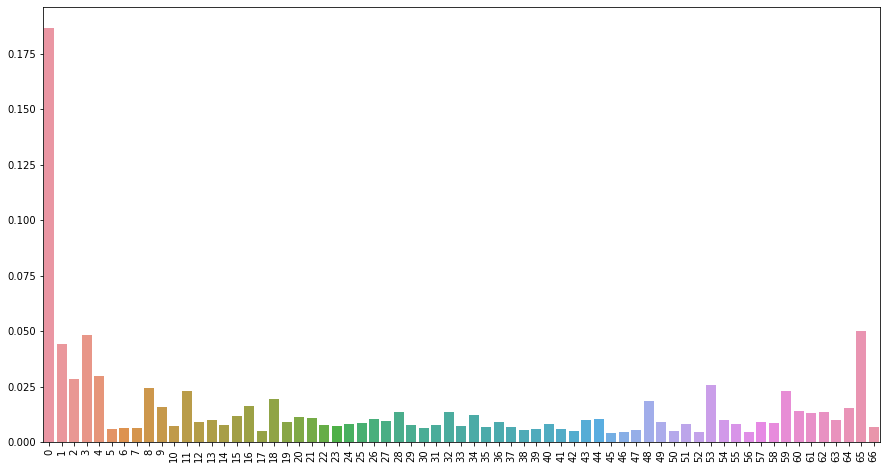

In [74]:
importances = reg2.feature_importances_
columns = X_nuevo_dataframe.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (15,8))
plt.xticks(rotation = 90)
sns.barplot(columns[indices], importances[indices])
plt.show()

Si bien no tengo los nombres de los features, esta distribución ya me dice que hay un atributo con peso bastante más grande que los otros, y que si no fuese por 2 o 3 variables más, el resto de los atributos tienen un peso relativamente similar y reducido. Nota: no aplico un heat map de corr porque por la cantidad de variables, es ilegibe, y ya estoy viendo el peso que obtiene cada una.

Aunque quizás no sea la idea más óptima extrapolar resultados en este caso, me atrevo a utilizar el dataset anterior al PCA y entrenarlo con el mismo modelo para ver los resultados que me arroja (con los nombres de los features) para sacer más conclusiones. 

In [75]:
X = data_4
y = data_3.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(82371, 101) (82371,) (35302, 101) (35302,)


In [76]:
reg3 = RandomForestRegressor(n_estimators=26, max_depth=18, criterion="mse", max_features='sqrt', bootstrap=False, n_jobs=-1, random_state = 42)
reg3.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=18, max_features='sqrt',
                      n_estimators=26, n_jobs=-1, random_state=42)

In [77]:
reg3.feature_importances_

array([6.77822822e-02, 5.09055892e-02, 2.31904620e-01, 2.50127446e-01,
       1.54796818e-01, 9.50740442e-03, 1.72799744e-02, 9.07754946e-03,
       4.63813660e-05, 9.19829657e-06, 1.34051076e-03, 8.46170542e-04,
       7.77469942e-04, 2.59634786e-03, 1.25285698e-04, 4.29923939e-03,
       1.57291682e-02, 3.13814840e-04, 1.68799450e-04, 1.49682360e-04,
       7.57917121e-04, 6.70171204e-07, 9.70518228e-06, 1.99565740e-04,
       1.51132925e-04, 1.34417602e-04, 6.80850702e-04, 2.47155372e-04,
       6.28111645e-04, 6.38143203e-04, 2.04048744e-04, 2.45905943e-04,
       1.69384349e-04, 6.29603190e-04, 4.98860364e-04, 3.11660493e-05,
       3.10610913e-03, 1.44173551e-04, 2.14233126e-04, 6.55220557e-04,
       2.96541034e-03, 3.92481368e-03, 2.42224452e-03, 1.64792664e-03,
       1.32242538e-04, 8.70700822e-04, 3.38535699e-04, 6.78216368e-05,
       3.48556674e-04, 6.16509533e-04, 2.92647753e-04, 1.08229877e-04,
       5.30596828e-04, 1.48654033e-03, 2.18750114e-03, 6.26534827e-04,
      

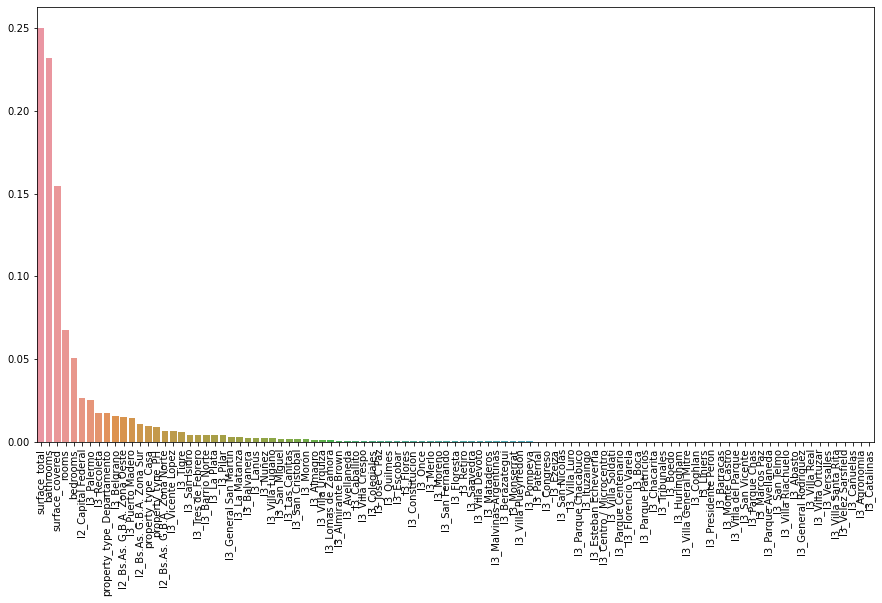

In [182]:
importances = reg3.feature_importances_
columns = data_4.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (15,8))
plt.xticks(rotation = 90)
sns.barplot(columns[indices], importances[indices])
plt.show()

Con esto podemos ver que los atributos más importantes son *surface_total* , *bathrooms* como los más importantes, luego *surface_covered* y más abajo *rooms* y *bedrooms*. Evidentemente no tiene una distribución similar a los datos con PCA, pero al ser pocos los valores más importanes, puedo pensar que las variables más predictoras en el dataset anterior están entre esas, siendo baños y superficie las más importante. Sí me llama la atención que mi hipótesis en función del tipo de propiedad no es tan fuerte como pensé, pero responde a lo planteado en el proyecto 1 donde analizaba la correlación de las variables y baños y superficie total eran las de más peso.

*Estimadores de árboles*

Volvamos a nuestro random forest optimizado con el dataset con PCA y veamos cómo estimó cada árbol. En este caso, por la cantidad de estimadores, voy a tener 26 árboles, donde sólo varía el random state.

In [164]:
reg2.estimators_

[DecisionTreeRegressor(max_depth=18, max_features='sqrt',
                       random_state=1608637542),
 DecisionTreeRegressor(max_depth=18, max_features='sqrt',
                       random_state=1273642419),
 DecisionTreeRegressor(max_depth=18, max_features='sqrt',
                       random_state=1935803228),
 DecisionTreeRegressor(max_depth=18, max_features='sqrt', random_state=787846414),
 DecisionTreeRegressor(max_depth=18, max_features='sqrt', random_state=996406378),
 DecisionTreeRegressor(max_depth=18, max_features='sqrt',
                       random_state=1201263687),
 DecisionTreeRegressor(max_depth=18, max_features='sqrt', random_state=423734972),
 DecisionTreeRegressor(max_depth=18, max_features='sqrt', random_state=415968276),
 DecisionTreeRegressor(max_depth=18, max_features='sqrt', random_state=670094950),
 DecisionTreeRegressor(max_depth=18, max_features='sqrt',
                       random_state=1914837113),
 DecisionTreeRegressor(max_depth=18, max_features=

Analizo los parámetros del árbol 15 y lo entreno para ver su desempeño

In [165]:
X = X_nuevo
y = data_3.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(82371, 67) (82371,) (35302, 67) (35302,)


In [166]:
reg2_tree = reg2.estimators_[15]
reg2_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 18,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 1433267572,
 'splitter': 'best'}

In [168]:
y_train_pred_reg2 = reg2_tree.predict(X_train)
y_test_pred_reg2 = reg2_tree.predict(X_test)

In [169]:
print('R^2 Training Score: {:.2f} \nR^2 Validation Score: {:.2f} \nRsme Train: {:.2f}  \nRsme Test: {:.2f} \nr2_cv: {:.2f} \nrsme_cv: {:.2f}'.format(reg2_tree.score(X_train, y_train), 
                                                                                             reg2_tree.score(X_test, y_test),
                                                                                             np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_reg2)),
                                                                                             np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_reg2)),
                                                                                             cross_val_score(reg2_tree, X_train, y_train, scoring='r2', cv=5).mean(),
                                                                                             cross_val_score(reg2_tree, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5).mean()))
                                                                                             

R^2 Training Score: 0.90 
R^2 Validation Score: 0.75 
Rsme Train: 29600.96  
Rsme Test: 46407.38 
r2_cv: 0.74 
rsme_cv: -47646.19


Acá puedo ver cómo con un sólo árbol me dio la diferencia entre train y test bastante overfitteado, y una diferencia mucho mayor de la que me dio el conjunto de árboles. Al promediarse los resultados de los demás árboles, éste dato se acomodó. También puede observarse cómo es resultado en CV también es bajo en comparación del forest completo. Ésto también me dice que como los resultados tienen mucho de azar también, se mejor reducirlo promediando el funcionamiento de varios árboles.

# CONCLUSIÓN GENERAL

Para no repetirme demasiado, podemos concluir que Random Forest ha sido el modelo que mejor resultados me da, y las variables más importantes son Baño y superficie total, mientras que las otras variables tienen una importancia o peso similar. 